In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
from operator import itemgetter
import missingno as msno

In [2]:
# get data
url = "http://data.insideairbnb.com/new-zealand/2022-05-12/data/listings.csv.gz"

listings=pd.read_csv(url)

In [3]:
listings['neighbourhood'] = listings['neighbourhood'].fillna('')
listings['price']=listings['price'].replace({'\$':'', ',':''}, regex = True)
listings['price'] = pd.to_numeric(listings['price'])
listings['neighbourhood'] = listings['neighbourhood'].replace({'':'Unspecified','奥克兰':'Auckland', '皇后镇':'Queenstown',
                                                              ', New Zealand':''}, regex = True)
# convert all names to lower case
listings["name"]=listings["name"].str.lower()
n = len(listings)


# Andra Code

In [4]:
data = listings[['price', 'neighbourhood']]
prices_by_neighbourhood = data.groupby('neighbourhood').agg({'price': np.mean})
prices_by_neighbourhood['neighbourhood'] = [name for name in prices_by_neighbourhood.index]

#Most expensive neighbourhood; average price is 4945
display(prices_by_neighbourhood.loc[(prices_by_neighbourhood['price']==max(prices_by_neighbourhood['price']))])

#Least expensive
display(prices_by_neighbourhood.loc[(prices_by_neighbourhood['price']==min(prices_by_neighbourhood['price']))])

,price,neighbourhood
neighbourhood,,
"Glendhu Bay, Otago",4945.0,"Glendhu Bay, Otago"


,price,neighbourhood
neighbourhood,,
"Auckland, Waikato",16.0,"Auckland, Waikato"
"Springs Junction, West Coast",16.0,"Springs Junction, West Coast"


In [5]:
top10 = prices_by_neighbourhood.sort_values('price', ascending=False).head(10) #top 10 most expensive
least10 = prices_by_neighbourhood.sort_values('price', ascending=False).tail(10) #least 10 most expensive

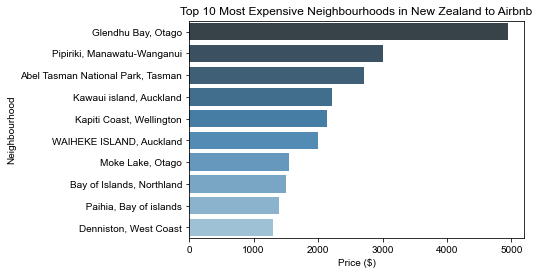

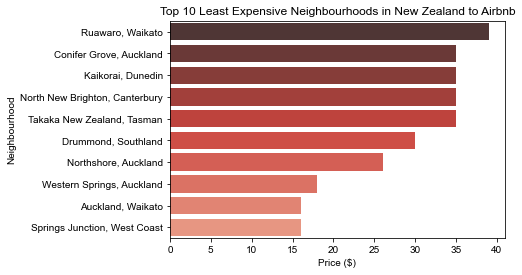

In [6]:
plt.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
blues = sns.color_palette("Blues_d", n_colors=10)
blues.reverse()
top = sns.barplot(y='neighbourhood', x='price', data=top10, palette=blues, orient='h').set(title='Top 10 Most Expensive Neighbourhoods in New Zealand to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Price ($)')
plt.show()

reds = sns.color_palette("Reds_d", n_colors=10)
reds.reverse()
least = sns.barplot(y='neighbourhood', x='price', palette=reds,data=least10, orient='h').set(title='Top 10 Least Expensive Neighbourhoods in New Zealand to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Price ($)')
plt.show()

#### Most popular places to rent out

In [7]:
#### Most popular places to rent outlistings.columns
listings[['neighbourhood', 'price', 'minimum_maximum_nights', 'maximum_minimum_nights']]
sub = listings[['price', 'neighbourhood','minimum_nights','maximum_nights']]
nbh_price_avg_nights = sub.groupby('neighbourhood').agg({'price': np.mean, 'minimum_nights':np.mean, 'maximum_nights':np.mean, 'neighbourhood':'count'})
nbh_price_avg_nights['diff'] = nbh_price_avg_nights['maximum_nights']-nbh_price_avg_nights['minimum_nights']
nbh_price_avg_nights['nbh']=[name for name in nbh_price_avg_nights.index]
nbh_price_avg_nights=nbh_price_avg_nights.rename(columns={'neighbourhood':'count'})
nbh_price_avg_nights.sort_values('count')

i = nbh_price_avg_nights[nbh_price_avg_nights.nbh=='Unspecified'].index
nbh_price_avg_nights=nbh_price_avg_nights.drop(i)
rankings = nbh_price_avg_nights.sort_values('count',ascending=False)
rankings.insert(0, 'ranking', range(1, 1+len(rankings)))
rankings

,ranking,price,minimum_nights,maximum_nights,count,diff,nbh
neighbourhood,,,,,,,
Auckland,1,212.222029,5.531884,590.297391,3450,584.765507,Auckland
"Christchurch, Canterbury",2,143.865833,4.262500,674.935000,1200,670.672500,"Christchurch, Canterbury"
"Queenstown, Otago",3,382.342593,2.710185,629.437963,1080,626.727778,"Queenstown, Otago"
Wellington,4,173.841584,4.403465,564.345297,808,559.941832,Wellington
"Wanaka, Otago",5,388.037924,3.071856,634.764471,501,631.692615,"Wanaka, Otago"
...,...,...,...,...,...,...,...
"Moeraki, OTA",1957,180.000000,1.000000,1125.000000,1,1124.000000,"Moeraki, OTA"
"Moawhango, Manawatu-Wanganui",1958,180.000000,2.000000,1125.000000,1,1123.000000,"Moawhango, Manawatu-Wanganui"
"Mitimiti, Northland",1959,164.000000,2.000000,1125.000000,1,1123.000000,"Mitimiti, Northland"


#### Top 10 most popular places to rent out of

In [8]:
top10 = rankings.sort_values('ranking', ascending=True).head(10) #top 10 most popular
display(top10)

,ranking,price,minimum_nights,maximum_nights,count,diff,nbh
neighbourhood,,,,,,,
Auckland,1,212.222029,5.531884,590.297391,3450,584.765507,Auckland
"Christchurch, Canterbury",2,143.865833,4.262500,674.935000,1200,670.672500,"Christchurch, Canterbury"
"Queenstown, Otago",3,382.342593,2.710185,629.437963,1080,626.727778,"Queenstown, Otago"
Wellington,4,173.841584,4.403465,564.345297,808,559.941832,Wellington
"Wanaka, Otago",5,388.037924,3.071856,634.764471,501,631.692615,"Wanaka, Otago"
"Taupo, Waikato",6,223.418919,1.626126,590.747748,444,589.121622,"Taupo, Waikato"
"Tauranga, Bay Of Plenty",7,255.128736,2.829885,605.202299,435,602.372414,"Tauranga, Bay Of Plenty"
"Dunedin, Otago",8,155.857868,2.604061,568.959391,394,566.355330,"Dunedin, Otago"
Nelson,9,169.880208,2.453125,614.942708,384,612.489583,Nelson


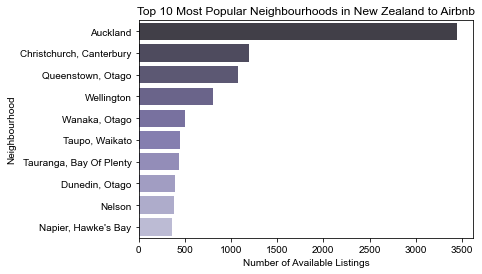

In [9]:
plt.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
purples = sns.color_palette("Purples_d", n_colors=10)
purples.reverse()
top = sns.barplot(y='nbh', x='count', data=top10, palette=purples, orient='h').set(title='Top 10 Most Popular Neighbourhoods in New Zealand to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Number of Available Listings')
plt.show()

### Most/least expensive properties

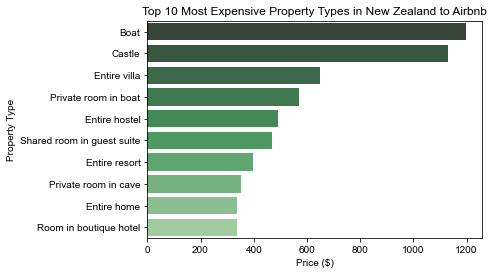

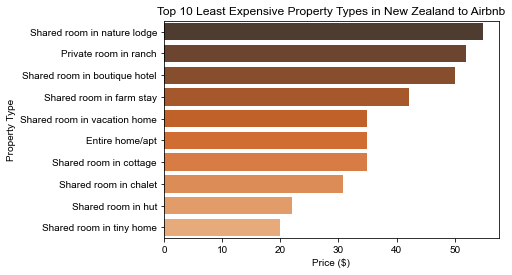

In [10]:
prop_nbh_price = listings[['property_type','neighbourhood','price']].groupby(['property_type','neighbourhood']).agg({'price':np.mean,
                                                                                                                    'property_type':'count'})
prop_nbh_price['property'] = [name[0] for name in prop_nbh_price.index]
prop_nbh_price['nbh'] = [name[1] for name in prop_nbh_price.index]
h = prop_nbh_price.groupby('property').agg({'price':np.mean})

#top 10
top10=h.sort_values('price', ascending=False).head(10)
#least 10
least10=h.sort_values('price',ascending=False).tail(10)

greens = sns.color_palette("Greens_d", n_colors=10)
greens.reverse() 
sns.barplot(y=top10.index, x='price', data=top10, palette=greens).set(title='Top 10 Most Expensive Property Types in New Zealand to Airbnb', 
                                                                                           ylabel='Property Type',
                                                                                          xlabel='Price ($)')
plt.show()

oranges = sns.color_palette("Oranges_d", n_colors=10)
oranges.reverse()
sns.barplot(y=least10.index, x='price', data=least10, palette=oranges).set(title='Top 10 Least Expensive Property Types in New Zealand to Airbnb', 
                                                                                           ylabel='Property Type',
                                                                                          xlabel='Price ($)')
plt.show()

### Is southern or northern new zealand more expensive on average?

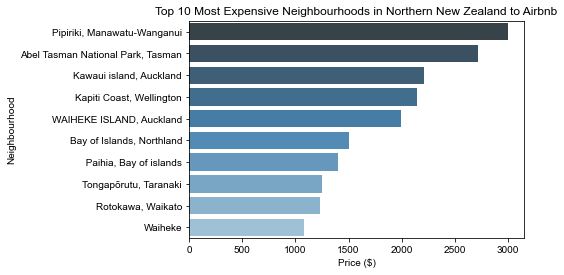

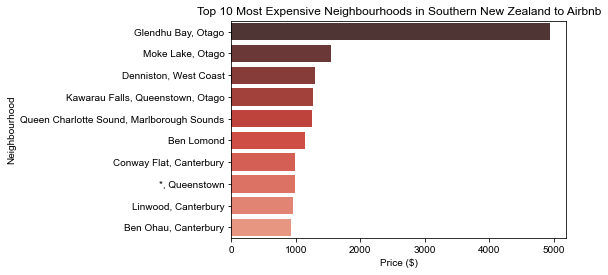

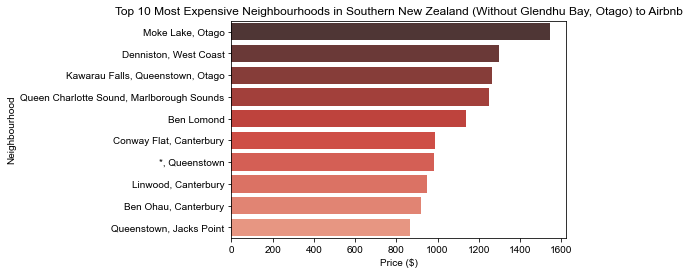

In [11]:
### Is southern or northern new zealand more expensive on average?#Southern coordinates: -41.084441, 174.119498
#Northern: above that
geographic = listings[['latitude', 'longitude','price','neighbourhood']].groupby(['neighbourhood', 'latitude', 'longitude']).agg({'price':np.mean})
geographic['lat']=[name[1] for name in geographic.index]
geographic['lon']=[name[2] for name in geographic.index]
geographic['nbh']=[name[0] for name in geographic.index]
northern = geographic.loc[geographic['lat']>-41.084441]
southern = geographic.loc[geographic['lat']<=-41.084441]

i = northern[northern['nbh']=='Unspecified'].index
northern=northern.drop(i)

i = southern[southern['nbh']=='Unspecified'].index
southern=southern.drop(i)

top10n = northern.groupby('nbh').agg({'price':np.mean}).sort_values('price',ascending=False).head(10)
top10s = southern.groupby('nbh').agg({'price':np.mean}).sort_values('price',ascending=False).head(10) 
#avg top ten in northern
sns.barplot(y=top10n.index, x='price', data=top10n, palette=blues, orient='h').set(title='Top 10 Most Expensive Neighbourhoods in Northern New Zealand to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Price ($)')

plt.show()
#top 10 southern
sns.barplot(y=top10s.index, x='price', data=top10s, palette=reds, orient='h').set(title='Top 10 Most Expensive Neighbourhoods in Southern New Zealand to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Price ($)')

plt.show()

#Removing Glendhu Bay
southern = southern.groupby('nbh').agg({'price':np.mean}).sort_values('price',ascending=False).head(11)
i = southern[southern.index=='Glendhu Bay, Otago'].index
southern=southern.drop(i)
ax = sns.barplot(y=southern.index, x='price', data=southern, palette=reds, orient='h').set(title='Top 10 Most Expensive Neighbourhoods in Southern New Zealand (Without Glendhu Bay, Otago) to Airbnb', 
                                                                                           ylabel='Neighbourhood',
                                                                                          xlabel='Price ($)')
plt.show()

### Most expensive property types per northern/southern NZ

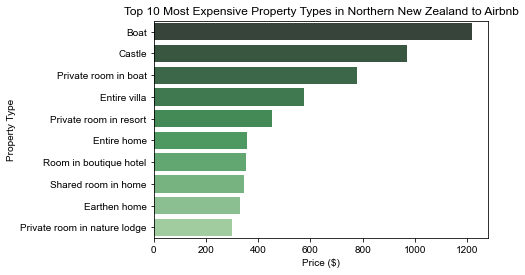

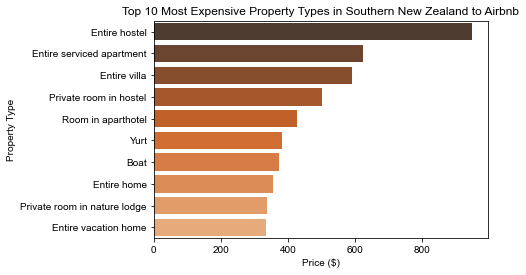

In [12]:
geographic = listings[['latitude', 'longitude','price','neighbourhood','property_type']].groupby(['neighbourhood', 'latitude', 'longitude', 'property_type']).agg({'price':np.mean})
geographic['nbh']=[name[0] for name in geographic.index]
geographic['lat']=[name[1] for name in geographic.index]
geographic['lon']=[name[2] for name in geographic.index]
geographic['prop']=[name[3] for name in geographic.index]


i = geographic[geographic['nbh']=='Unspecified'].index
geographic=geographic.drop(i)

northern = geographic.loc[geographic['lat']>-41.084441].groupby(['prop']).agg({'price':np.mean})
southern = geographic.loc[geographic['lat']<=-41.084441].groupby(['prop']).agg({'price':np.mean})

top10n = northern.sort_values('price',ascending=False).head(10)
top10s = southern.sort_values('price',ascending=False).head(10)

sns.barplot(y=top10n.index, x='price', data=top10n, palette=greens, orient='h').set(title='Top 10 Most Expensive Property Types in Northern New Zealand to Airbnb', 
                                                                                           ylabel='Property Type',
                                                                                          xlabel='Price ($)')

plt.show()
#top 10 southern
sns.barplot(y=top10s.index, x='price', data=top10s, palette=oranges, orient='h').set(title='Top 10 Most Expensive Property Types in Southern New Zealand to Airbnb', 
                                                                                           ylabel='Property Type',
                                                                                          xlabel='Price ($)')

plt.show()

# Edan Code

In [13]:
def dfToPts(df, minwords=100):
    
    # create dict with keys being index and values being list of words
    # present in specific listing name
    words_dict = {i:re.sub("[^a-z]+", " ",str(listings["name"][i])).split() 
         for i in range(n)}
    
    # create list of lists of all the words including duplicates
    vals = list(words_dict.values())   
    out = []
    
    # flatten list
    for sublist in vals:
        out.extend(sublist)

    # create dictionary for word count
    cnt = Counter(out)
    
    # only keep words that appear more than minwords teams
    words_list = [k for k, v in cnt.items() if v > minwords]
    
    
    ind = list()
    for i in range(len(words_list)):
        # indices for which word is present in name
        values =  [j for j in range(n)
                  if words_list[i] in str(listings["name"][j])]
        
        # create list of indices for each word
        ind.append(values)
    
    # find mean price for each word
    means = [[words_list[i], np.mean(listings.price[ind[i]])] 
             for i in range(len(words_list))]

    # sort list of lists by mean price
    means_sorted = sorted(means, key=itemgetter(1))

    # separate words from means
    xs, ys = [*zip(*means_sorted)]
    return xs, ys


In [14]:
def make_barplot(xs, ys, reverse = False, num = 10, minwords = 100):
    # get highest prices if reverse is True
    if reverse == True:
        xs = xs[::-1]
        ys = ys[::-1]
        string = str(num) + " Keywords Assosciated with Highest Price" +\
        " (Min " + str(minwords) + " Listings)"
    else:
        string = str(num) + " Keywords Assosciated with Lowest Price" +\
        " (Min " + str(minwords) + " Listings)"
        
    # only get first num values
    xs = xs[:num]
    ys = ys[:num]
    
    # create figure for plot
    fig = plt.figure(figsize=(20,10))
    
    # create color palette
    p = "ch:start=.0,rot=-.2"
    
    # reverse color palette if needed 
    if reverse == True:
        p = "ch:start=.0,rot=-.2" + "_r"
        
    # plot barplot and get labels
    plt.bar(xs, ys, color = sns.color_palette(p, len(xs)))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Keyword in Listing Name",fontsize = 24)
    plt.ylabel("Price in $",fontsize = 24)
    plt.title(string,fontsize = 30)
    plt.show()


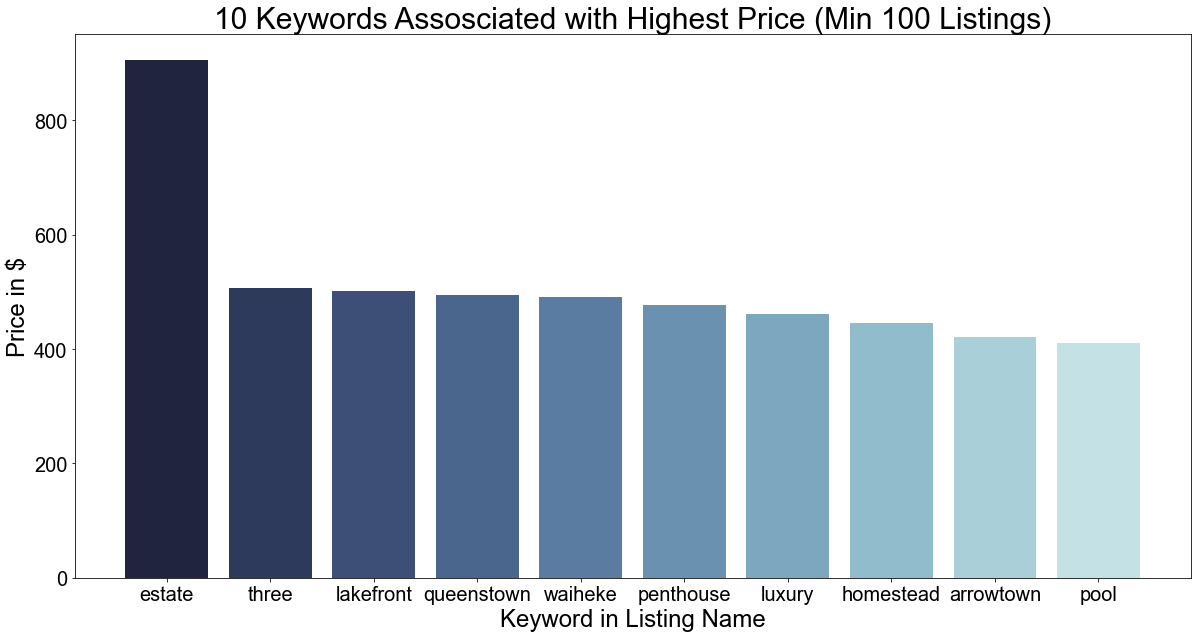

In [15]:
xs, ys = dfToPts(data)
make_barplot(xs, ys, reverse = True)

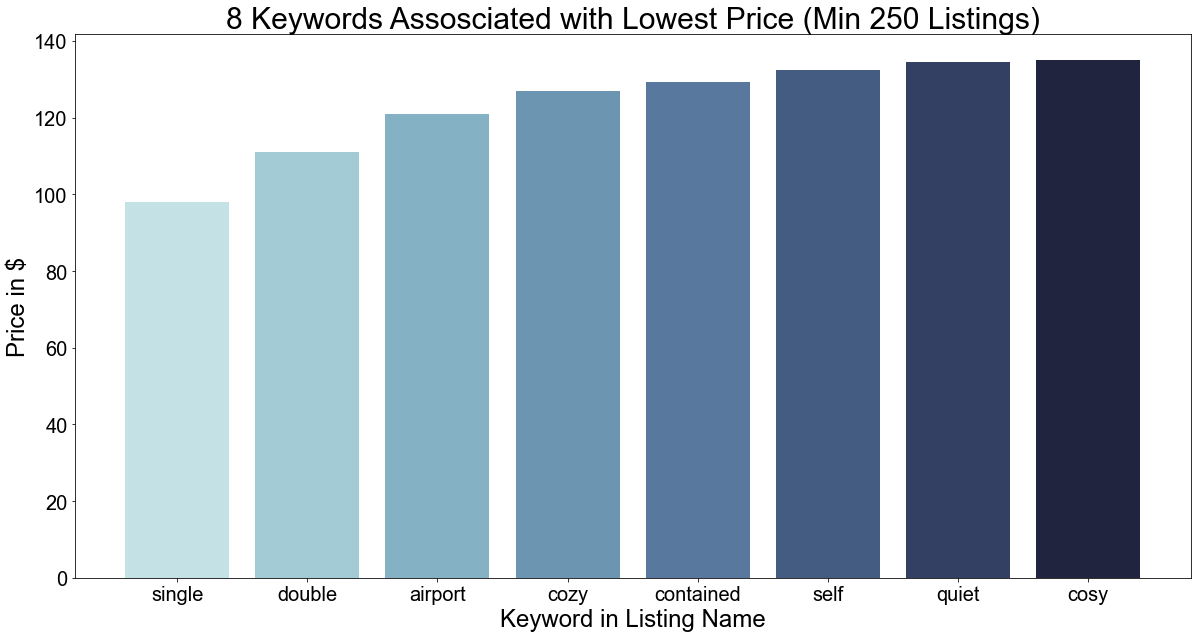

In [16]:
xs, ys = dfToPts(data, minwords = 250)
make_barplot(xs, ys, minwords = 250, num = 8)

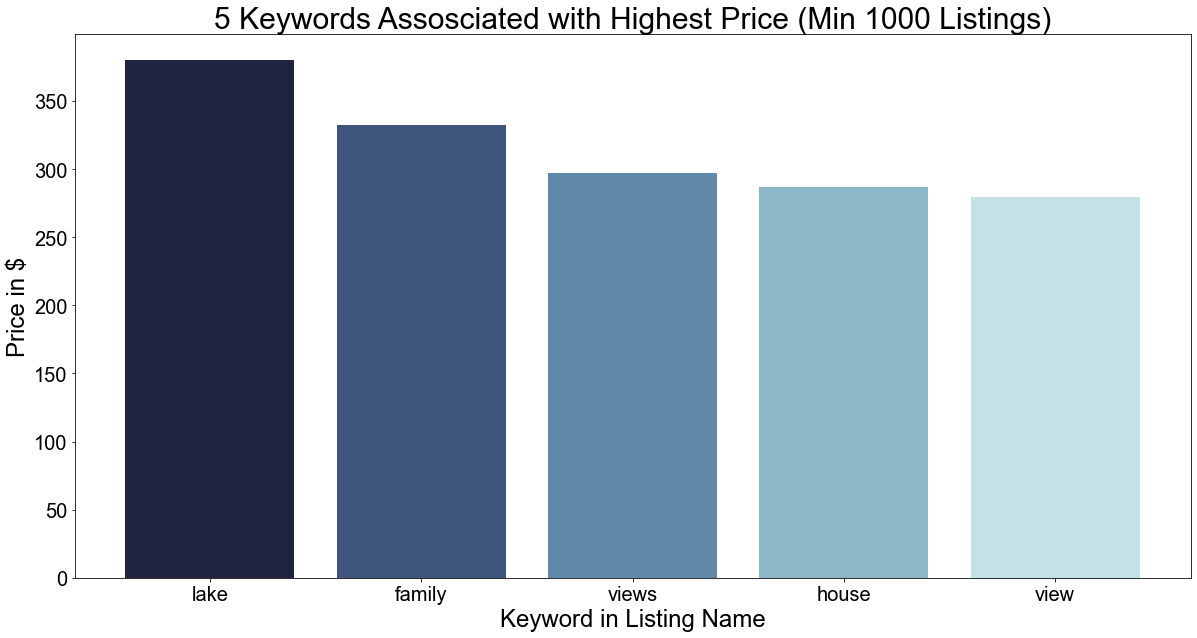

In [17]:
xs, ys = dfToPts(data, minwords = 1000)
make_barplot(xs, ys, num = 5, minwords = 1000, reverse = True)

# Liv Code

## Investigation of Review Trends

## Relevant Terms:

(from airbnb's data dictionary)
* price: daily price in local currency
* number_of_reviews: the number of reviews the listing has
* number_of_reviews_ltm: the number of reviews the listing has in the last 12 months
* number_of_reviews_l30d: the number of reviews the listing has in the last 30 days
* review_scores_rating: ratings for hosts from 1 (worst) to 5 (best) for the overall experience and for specific categories, including: overall experience, cleanliness, accuracy, value, communication, check-in, and location: these variables (review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location) are also included in the dataset
* review_scores_value: rating from 1-5 of whether the guest felt that the listing provided good value for the price

Does number of reviews affect price?
Can more established hosts have higher prices? We can determine if hosts who have more feedback are able to charge higher prices due to being more reputable and having more experience hosting customers.


### Data Cleaning

#### Investigate Missing Values

In [18]:
df_reviews = listings[['price','number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_value']]

In [19]:
# divides NaN values / total reviews; comes out to about 11% data missing for scores rating, 12% for scores accuracy
print((df_reviews.isnull().sum())/df_reviews.shape[0])

price                     0.000000
number_of_reviews         0.000000
number_of_reviews_ltm     0.000000
number_of_reviews_l30d    0.000000
review_scores_rating      0.117349
review_scores_value       0.121013
dtype: float64


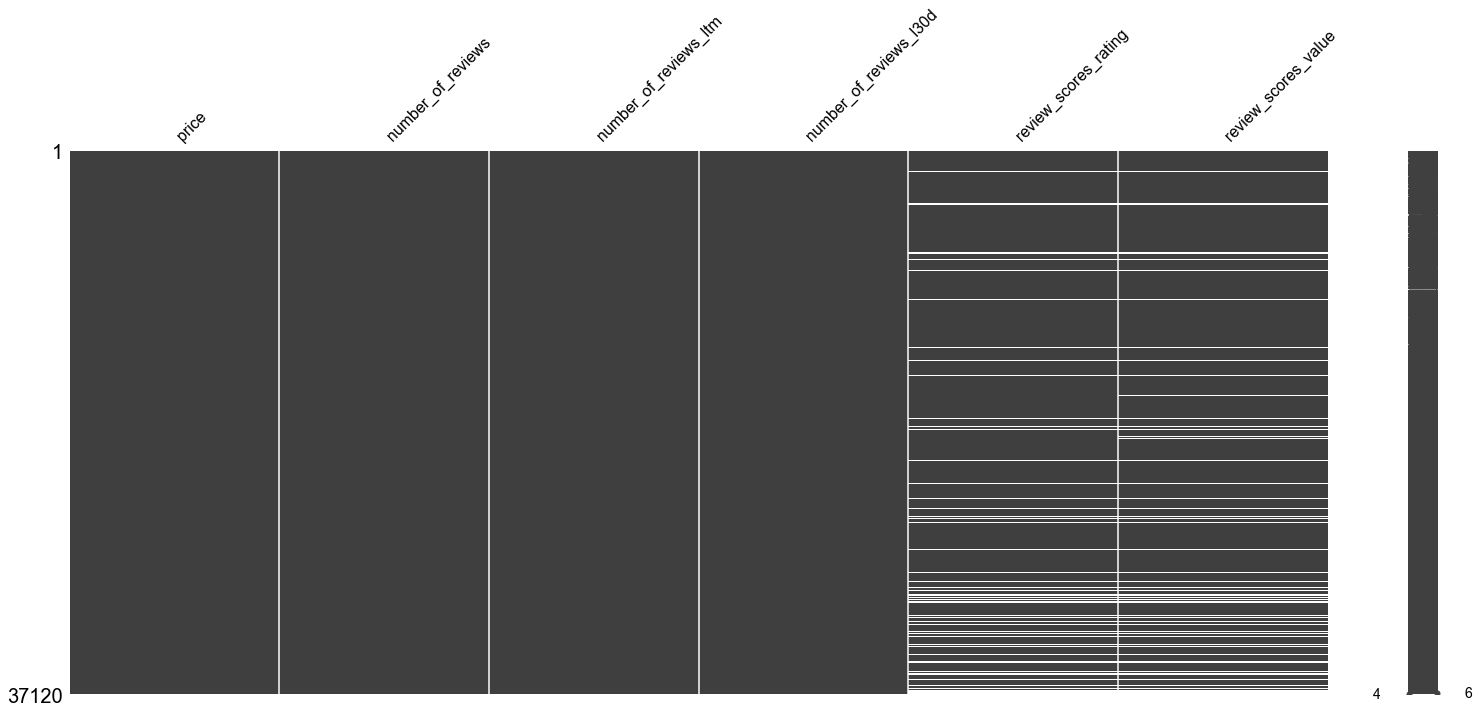

In [20]:
msno.matrix(df_reviews);
# while there are quite

Looking at the msno matrix, we can investigate the data sparsity to visualize the missing values. Review scores rating and value all have missing values, and the pattern reveals more missing reviews increase towards the end of the data set. Even with missing values, the set is so large that we still have enough observations to investigate trends.

However isn't it kinda biased if we just remove all the NAs? Idk I'll look into this later

We can also investiage why there are more missing reviews there later if we want idk

### Look for initial trends

We can create scatter matrices to see if there are any noticeable trends in reviews vs price

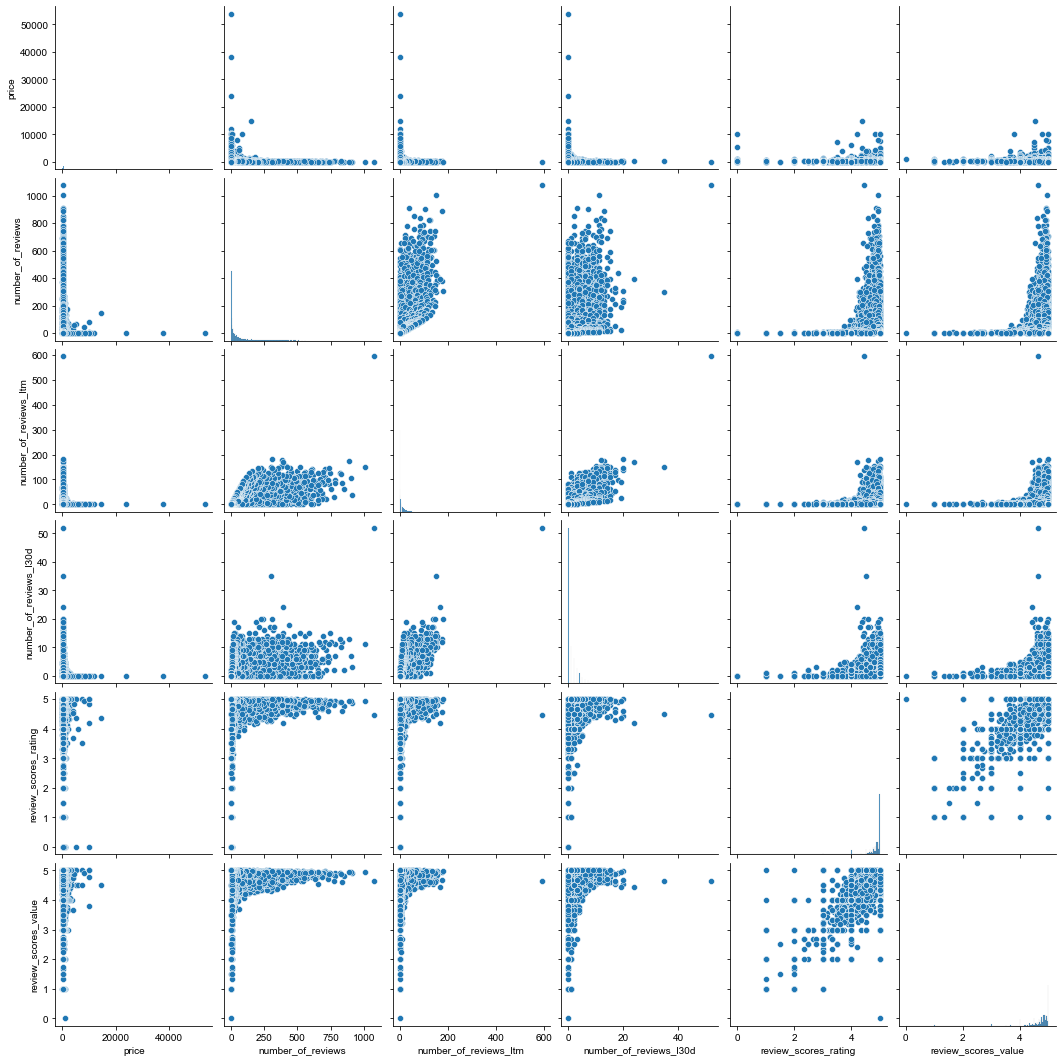

In [21]:
sns.pairplot(df_reviews)
plt.show()

A few interesting trends to look into are review score rating vs price, number of reviews vs price, and review scores value vs rating

### Prepare dfs

In [22]:
df_rating = listings[["price", "review_scores_rating"]]
df_num = listings[["price", "number_of_reviews"]]
df_value = listings[["review_scores_value", "review_scores_rating"]]

In [23]:
df_rating = df_rating.dropna()
df_num = df_num.dropna()
df_value = df_value.dropna()

### Review Scores Rating vs Price

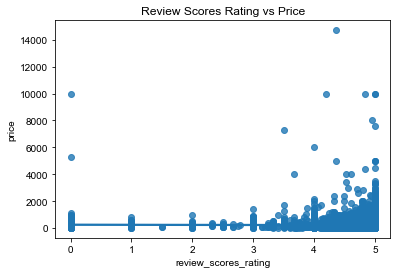

In [24]:
sns.regplot(x="review_scores_rating",y="price",
            data=df_rating).set(title='Review Scores Rating vs Price')
plt.show()

We can see from the regression plot there does seem to be a positive relationship between review score and price, but the really high prices are compressing the graph so it will be easier to observe the trend if we remove them

While i'd normally use a cutoff of 1.5 or 3 for the outliers it made the graph too crowded.
Here we can better observe the trend
Other trends would probably be easier to visualize with a bar plot:

In [25]:
# round the price
df_rating2 = df_rating
df_rating2 = df_rating2.round({"review_scores_rating" : 0})

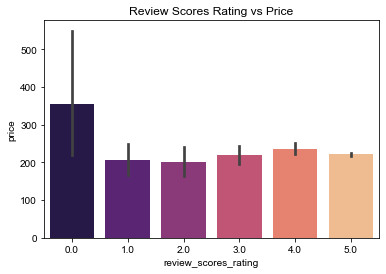

In [26]:
sns.barplot(x = df_rating2.review_scores_rating, 
            y = df_rating2.price, palette = "magma").set(title='Review Scores Rating vs Price')
plt.show()

### Review Scores value vs Rating

In [27]:
# round the price
df_value2 = df_value.round({"review_scores_rating" : 0})
df_value2 = df_value2.round({"review_scores_value" : 0})

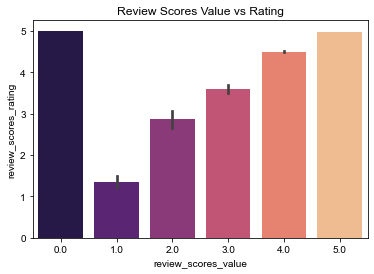

In [28]:
sns.barplot(x = df_value2.review_scores_value, 
            y = df_value2.review_scores_rating, 
            palette = "magma").set(title='Review Scores Value vs Rating')
plt.show()

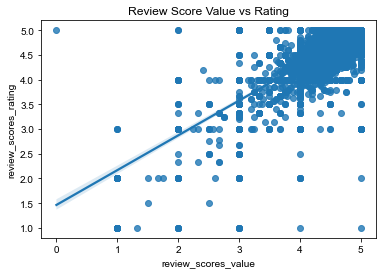

In [29]:
sns.regplot(x="review_scores_value",y= "review_scores_rating",
            data = df_value).set(title='Review Score Value vs Rating')
plt.show()

### Number of Reviews vs Price

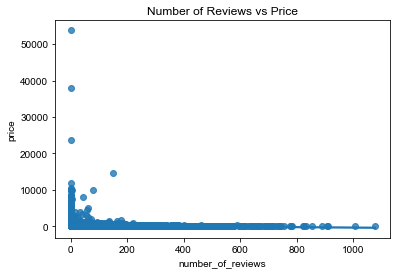

In [30]:
sns.regplot(x="number_of_reviews",y= "price", 
            data = df_num).set(title='Number of Reviews vs Price')
plt.show()

In [31]:
cols = ['price', 'number_of_reviews'] # one or more

Q1 = df_num[cols].quantile(0.25)
Q3 = df_num[cols].quantile(0.75)
IQR = Q3 - Q1

df_num2 = df_num[~((df_num[cols] < (Q1 - 7 * IQR)) |
                   (df_num[cols] > (Q3 + 7 * IQR))).any(axis=1)]

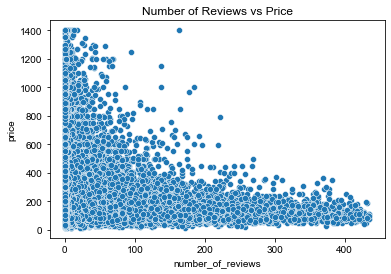

In [32]:
sns.scatterplot(data=df_num2, x = "number_of_reviews", 
                y = "price").set(title='Number of Reviews vs Price')
plt.show()

In [38]:
# scale values to round and make a barplot
df_num3 = round(df_num2['number_of_reviews'] / 100) * 100

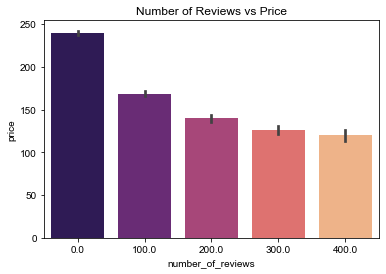

In [39]:
sns.barplot(x = df_num3, y = df_num2.price, 
            palette = "magma").set(title='Number of Reviews vs Price')
plt.show()